# Sensor Time-Series Analysis

* This notebook serves as an introduction to work on data collected from sensors embedded in the IoT devices.
> "Time series is a series of data points indexed (or listed or graphed) in time order."

<figure class="image">
  <img src="https://2aih25gkk2pi65s8wfa8kzvi-wpengine.netdna-ssl.com/statistics/files/2018/05/time_series.png" alt="A sample time-series">
  <figcaption style="text-align: center;" >A sample time-series (source:https://magoosh.com/statistics/author/shaunault/).</figcaption>
</figure>

## A. Importing the required Libraries

In [1]:
## NumPy is a package in Python used for Scientific Computing. NumPy package is used to perform different operations. The ndarray (NumPy Array) is a multidimensional array used to store values of same datatype.
import numpy as np
## Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.
import pandas as pd
## Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.
import matplotlib
import matplotlib.pyplot as plt
## Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

In [2]:
## `%matplotlib` is a magic function in IPython. With this, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
%matplotlib inline

> **NOTE:** If you need to know more about Python programming language, this free book is highly recommended:
* PDF: [A Whirlwind Tour of Python](https://www.oreilly.com/programming/free/files/a-whirlwind-tour-of-python.pdf)  
* Code: https://github.com/jakevdp/WhirlwindTourOfPython

### The weather and energy dataset
The dataset contains the readings with a time span of 1 minute of house appliances in kW from a smart meter and weather conditions of that particular region.

#### Data Columns Descriptions:
(source: Data Source: https://www.kaggle.com/taranvee/smart-home-dataset-with-weather-information)
##### Index 
- **time**
    * Time of the readings, with a time span of 1 minute.

##### Energy Usage 
- **use [kW]**
    * Total energy consumption
- **gen [kW]**
    * Total energy generated by means of solar or other power generation resources
- **House overall [kW]**
    * overall house energy consumption
- **Dishwasher [kW]** 
    * energy consumed by specific appliance
- **Furnace 1 [kW]**
    * energy consumed by specific appliance
- **Furnace 2 [kW]**
    * energy consumed by specific appliance
- **Home office [kW]**
    * energy consumed by specific appliance
- **Fridge [kW]**
    * energy consumed by specific appliance
- **Wine cellar [kW]**
    * energy consumed by specific appliance
- **Garage door [kW]**
    * energy consumed by specific appliance
- **Kitchen 12 [kW]**
    * energy consumption in kitchen 1
- **Kitchen 14 [kW]**
    * energy consumption in kitchen 2
- **Kitchen 38 [kW]**
    * energy consumption in kitchen 3
- **Barn [kW]**
    * energy consumed by specific appliance
- **Well [kW]**
    * energy consumed by specific appliance
- **Microwave [kW]**
    * energy consumed by specific appliance
- **Living room [kW]**
    * energy consumption in Living room
- **Solar [kW]**
    * Solar power generation

##### Weather
- **temperature**:
    * emperature is a physical quantity expressing hot and cold.
- **humidity**:
    * Humidity is the concentration of water vapour present in air.
- **visibility**:
    * Visibility sensors measure the meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its luminous flux is reduced to 5% of its original value.

- **apparentTemperature**:
    * Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. The measure is most commonly applied to the perceived outdoor temperature.
- **pressure**: 
    * Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather
- **windSpeed**:
    * Wind speed, or wind flow speed, is a fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature.
- **cloudCover**:
    * Cloud cover (also known as cloudiness, cloudage, or cloud amount) refers to the fraction of the sky obscured by clouds when observed from a particular location. Okta is the usual unit of measurement of the cloud cover.
- **windBearing**:
    * In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings."
- **dewPoint**:
    * the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form.
- **precipProbability**:
    * A probability of precipitation (POP), also referred to as chance of precipitation or chance of rain, is a measure of the probability that at least some minimum quantity of precipitation will occur within a specified forecast period and location.
- **precipIntensity**:
    * The intensity of rainfall is a measure of the amount of rain that falls over time. The intensity of rain is measured in the height of the water layer covering the ground in a period of time. It means that if the rain stays where it falls, it would form a layer of a certain height.
 
##### Others
- **summary**:
    * Report generated by the by the data collection systm (apparently!).
    * Including:
    ```
    Clear, Mostly Cloudy, Overcast, Partly Cloudy, Drizzle,
       Light Rain, Rain, Light Snow, Flurries, Breezy, Snow,
       Rain and Breezy, Foggy, Breezy and Mostly Cloudy,
       Breezy and Partly Cloudy, Flurries and Breezy, Dry,
       Heavy, Snow.
    ```
- **icon**:
    * The icon that is used by the data collection systm (apparently!).
    * Including:
    ```
    cloudy, clear-night, partly-cloudy-night, clear-day, partly-cloudy-day, rain, snow, wind, fog.
    ```
    

## B. Reading the Dataset File
If you have downloaded the notebook, change the `file_path` to the right path.**

In [3]:
## pandas.read_csv: Read a comma-separated values (csv) file into DataFrame.
file_path = "/kaggle/input/smart-home-dataset-with-weather-information/HomeC.csv"
dataset = pd.read_csv(file_path, low_memory=False)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
time                   503911 non-null object
use [kW]               503910 non-null float64
gen [kW]               503910 non-null float64
House overall [kW]     503910 non-null float64
Dishwasher [kW]        503910 non-null float64
Furnace 1 [kW]         503910 non-null float64
Furnace 2 [kW]         503910 non-null float64
Home office [kW]       503910 non-null float64
Fridge [kW]            503910 non-null float64
Wine cellar [kW]       503910 non-null float64
Garage door [kW]       503910 non-null float64
Kitchen 12 [kW]        503910 non-null float64
Kitchen 14 [kW]        503910 non-null float64
Kitchen 38 [kW]        503910 non-null float64
Barn [kW]              503910 non-null float64
Well [kW]              503910 non-null float64
Microwave [kW]         503910 non-null float64
Living room [kW]       503910 non-null float64
Solar [kW]             503910 non-null float

> Let's have a look at name and data type of each feature (column).

In [4]:
tmp_str = "Feature(attribute)     DataType"; print(tmp_str+"\n"+"-"*len(tmp_str))
print(dataset.dtypes)

Feature(attribute)     DataType
-------------------------------
time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoi

In [5]:
## Return a tuple representing the dimensionality of the DataFrame.
print("Shape of the data: {} --> n_rows = {}, n_cols = {}".format(dataset.shape, dataset.shape[0],dataset.shape[1]))

Shape of the data: (503911, 32) --> n_rows = 503911, n_cols = 32


In [6]:
## pandas.DataFrame.head: This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.
dataset.head(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
5,1451624405,1.391867,0.003433,1.391867,0.000283,0.503250,0.063667,0.447033,0.122300,0.006717,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
6,1451624406,1.366217,0.003450,1.366217,0.000283,0.499400,0.063717,0.443267,0.122050,0.006733,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
7,1451624407,1.431900,0.003417,1.431900,0.000250,0.477867,0.178633,0.444283,0.121800,0.006783,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
8,1451624408,1.627300,0.003417,1.627300,0.000183,0.447650,0.365700,0.441467,0.121617,0.006950,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
9,1451624409,1.735383,0.003417,1.735383,0.000017,0.171550,0.682500,0.438733,0.121633,0.007233,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [7]:
## This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows.
dataset.tail(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503901,1452128301,1.537383,0.003183,1.537383,0.000133,0.021683,0.642733,0.042033,0.005283,0.008333,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503902,1452128302,1.551817,0.003200,1.551817,0.000050,0.056200,0.624783,0.041750,0.005250,0.008450,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503903,1452128303,1.599617,0.003217,1.599617,0.000067,0.089217,0.638650,0.041750,0.005617,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503904,1452128304,1.608867,0.003217,1.608867,0.000033,0.114300,0.623283,0.041817,0.005217,0.008350,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Wee see that the last row is invalid, so let's remove it.

In [8]:
dataset = dataset[0:-1] ## == dataset[0:dataset.shape[0]-1] == dataset[0:len(dataset)-1] == dataset[:-1]
dataset.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


> **Note:** To know more about Pandas DataFrame see this: https://towardsdatascience.com/pandas-dataframe-a-lightweight-intro-680e3a212b96

> **A numpy trick**: `numpy.r` is the simple way to build up arrays quickly

In [9]:
np.r_[0:5, -5:0]

array([ 0,  1,  2,  3,  4, -5, -4, -3, -2, -1])

> Then, you can use the array to index your dataframe. For example, here I want to see the first and the last 5 samples:

In [10]:
dataset.iloc[np.r_[0:5, -5:0]]

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [11]:
## pandas.DataFrame.columns: The column labels of the DataFrame.
dataset.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

> Let's clean the columns names by removing the `[kW]` uint.

In [12]:
# Python string method replace() returns a copy of the string in which the occurrences of old have been replaced with new, optionally restricting the number of replacements to max.
dataset.columns = [col.replace(' [kW]', '') for col in dataset.columns]
dataset.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

> Sometimes we are only interest in an aggregated result. To make it easy, we can make a new column and save the desired result in that new column.
> For example: if we are interested in the `total` energy usage by both `furnaces` or the `average` usage of all `kitchens`:

In [13]:
dataset['sum_Furnace'] = dataset[['Furnace 1','Furnace 2']].sum(axis=1)
dataset['avg_Kitchen'] = dataset[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)

> If you do not need old columns, you can drop them.

In [14]:
dataset = dataset.drop(['Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)
dataset = dataset.drop(['Furnace 1','Furnace 2'], axis=1)
dataset.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Home office',
       'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'sum_Furnace', 'avg_Kitchen'],
      dtype='object')

## C. Indexing rows by `Time`

* In this dataset, time is recorded in the [Unix Time](https://en.wikipedia.org/wiki/Unix_time) format.
> Unix Time represents the number of seconds that have passed since `00:00:00 UTC Thursday, 1 January 1970`.

In [15]:
dataset['time'].head()

0    1451624400
1    1451624401
2    1451624402
3    1451624403
4    1451624404
Name: time, dtype: object

> We would like to convert this large number that represents a unix timestamp (i.e. "1284101485") to a readable date. So, one idea is to now when is the `start time`.

In [16]:
import time 
print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(dataset['time'].iloc[0]))))

 start  2016-01-01 05:00:00


>  Data publisher says the dataset contains the readings with a time span of `1 minute` of house appliances
in `kW` from a `smart meter` and `weather conditions` of that particular region.
So, we set `freq='min'` and convert Uinx time to readable date.

In [17]:
time_index = pd.date_range('2016-01-01 05:00', periods=len(dataset),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
dataset = dataset.set_index(time_index)
dataset = dataset.drop(['time'], axis=1)
dataset.iloc[np.r_[0:5,-5:0]].iloc[:,0]

2016-01-01 05:00:00    0.932833
2016-01-01 05:01:00    0.934333
2016-01-01 05:02:00    0.931817
2016-01-01 05:03:00    1.022050
2016-01-01 05:04:00    1.139400
2016-12-16 03:25:00    1.601233
2016-12-16 03:26:00    1.599333
2016-12-16 03:27:00    1.924267
2016-12-16 03:28:00    1.978200
2016-12-16 03:29:00    1.990950
Name: use, dtype: float64

## D. ReSampling

In [18]:
dataset.shape

(503910, 28)

> We have 500K rows and each row shows the home status at a specific `minute`.
Let's plot the `temperature` data and see what is the result.

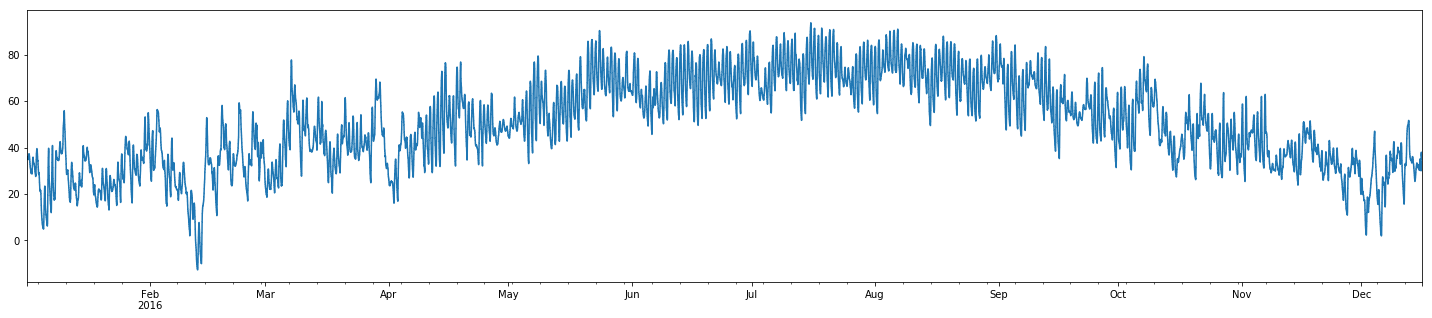

In [19]:
dataset['temperature'].plot(figsize=(25,5))

> It may seem too noisy to you. We can `resample` data by taking the `average temperature` every `day` and then plot it.

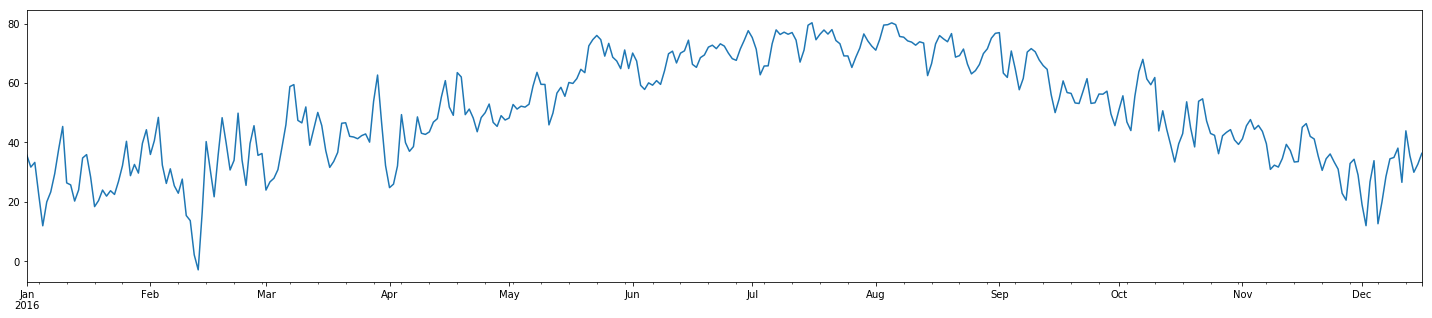

In [20]:
## pandas.DataFrame.resample: Convenience method for frequency conversion and resampling of time series. 
dataset['temperature'].resample(rule='D').mean().plot(figsize=(25,5))

> Here are the `rule`s you can use:
- B         business day frequency
- C         custom business day frequency (experimental)
- D         calendar day frequency
- W         weekly frequency
- M         month end frequency
- SM        semi-month end frequency (15th and end of month)
- BM        business month end frequency
- CBM       custom business month end frequency
- MS        month start frequency
- SMS       semi-month start frequency (1st and 15th)
- BMS       business month start frequency
- CBMS      custom business month start frequency
- Q         quarter end frequency
- BQ        business quarter endfrequency
- QS        quarter start frequency
- BQS       business quarter start frequency
- A         year end frequency
- BA, BY    business year end frequency
- AS, YS    year start frequency
- BAS, BYS  business year start frequency
- BH        business hour frequency
- H         hourly frequency
- T, min    minutely frequency
- S         secondly frequency
- L, ms     milliseconds
- U, us     microseconds
- N         nanoseconds

## E. Data Cleaning

> We fix our desired figure size.

In [21]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,5)

Now, we look at the dataset columns

In [22]:
dataset.columns

Index(['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'sum_Furnace', 'avg_Kitchen'],
      dtype='object')

> It seems `use` and `House overall` show the same data. Let's visualize these two columns.

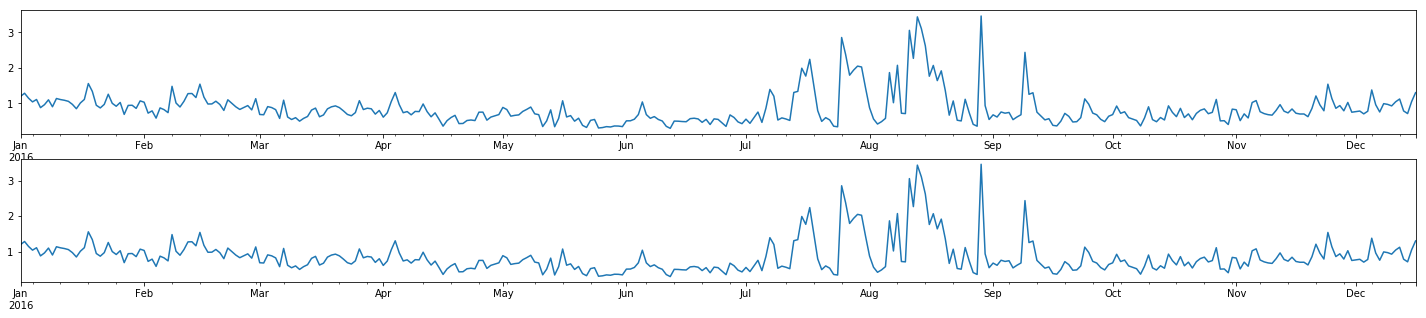

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1)
dataset['use'].resample('D').mean().plot(ax=axes[0])
dataset['House overall'].resample('D').mean().plot(ax=axes[1])

> They are same. It's better to remove one of them.

In [24]:
dataset = dataset.drop(columns=['House overall'])
dataset.shape

(503910, 27)

> Columns `summary` and `icon` are not numerical. In this tutorial we do not need them. 

In [25]:
## pandas.Series.value_counts: Return a Series containing counts of unique values.
dataset['icon'].value_counts()

clear-night            194536
clear-day              182252
rain                    43081
partly-cloudy-day       39492
partly-cloudy-night     27324
snow                     7550
cloudy                   6041
wind                     2660
fog                       974
Name: icon, dtype: int64

In [26]:
dataset = dataset.drop(columns=['summary', 'icon'])
dataset.shape

(503910, 25)

In [27]:
## pandas.Series.unique: Uniques are returned in order of appearance. Hash table-based unique, therefore does NOT sort.
dataset['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', '0.41', '0.78', '0.2', '0.77', '0.46', '0.55', '0.01',
       '0.51', '0.47', '0.5', '0.4', '0.3', '0.43', '0.33', '0.6', '0.68',
       '0.66', '0.45', '0.34', '0.52', '0.67', '0.49', '0.37', '0.36',
       '0.61', '0.38', '0.42', '0.53', '0.63', '0.32', '0.56', '0.58',
       '0.72', '0.73', '0.71', '0.64', '0.59'], dtype=object)

> We see that for some rows we have an invalid value for `cloudCover`. 

In [28]:
dataset[dataset['cloudCover']=='cloudCover'].shape

(58, 25)

> There are plenty of ways deal with this kind of invalid values. The simplest one is to remove rows that include this invalid value. but more sophisticated way is to replace them. see this: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [29]:
dataset['cloudCover'][56:60]

2016-01-01 05:56:00    cloudCover
2016-01-01 05:57:00    cloudCover
2016-01-01 05:58:00          0.75
2016-01-01 05:59:00          0.75
Freq: T, Name: cloudCover, dtype: object

> We replace this missing valuess with the next valid observagion  we have.

In [30]:
dataset['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
dataset['cloudCover'] = dataset['cloudCover'].astype('float')
dataset['cloudCover'].unique()

array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

In [31]:
dataset['cloudCover'][56:60]

2016-01-01 05:56:00    0.75
2016-01-01 05:57:00    0.75
2016-01-01 05:58:00    0.75
2016-01-01 05:59:00    0.75
Freq: T, Name: cloudCover, dtype: float64

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Freq: T
Data columns (total 25 columns):
use                    503910 non-null float64
gen                    503910 non-null float64
Dishwasher             503910 non-null float64
Home office            503910 non-null float64
Fridge                 503910 non-null float64
Wine cellar            503910 non-null float64
Garage door            503910 non-null float64
Barn                   503910 non-null float64
Well                   503910 non-null float64
Microwave              503910 non-null float64
Living room            503910 non-null float64
Solar                  503910 non-null float64
temperature            503910 non-null float64
humidity               503910 non-null float64
visibility             503910 non-null float64
apparentTemperature    503910 non-null float64
pressure               503910 non-null float64
windSpeed              503910 non-null float64
c

> Now everything is neumerical. From now on, for the sake of simplicity, let's only work on `hourly` dataset.

In [33]:
dataset = dataset.resample('H').mean()
print("Shape of hourly dataset: {} --> n_rows = {}, n_cols = {}".format(dataset.shape, dataset.shape[0],dataset.shape[1]))

Shape of hourly dataset: (8399, 25) --> n_rows = 8399, n_cols = 25


## F. Visualization

> We want to see what is the Microwave usage pattern during a day (24 hours)

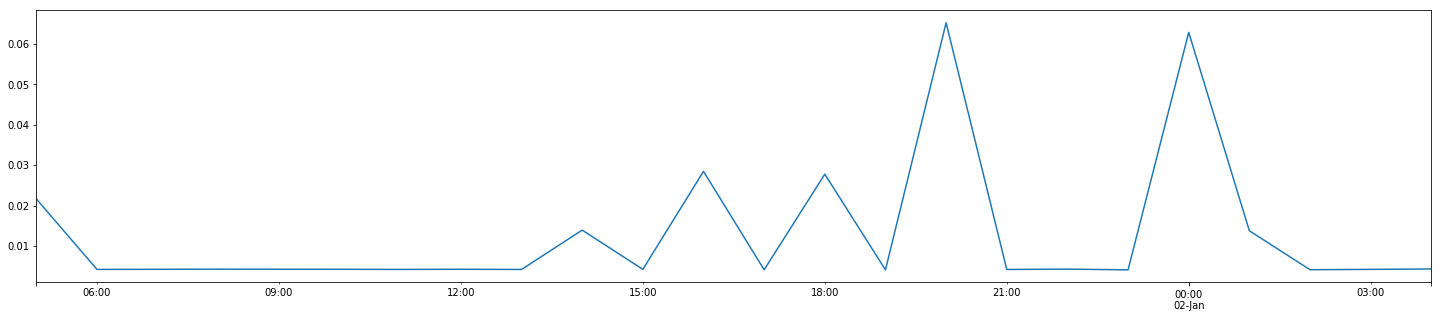

In [34]:
dataset['Microwave'].resample("h").mean().iloc[:24].plot()

> The above plot just shows the usage for 1 specific day (02-Jan). What if we want average croos all the days.

[Text(0, 0.5, 'Microwave Usage (kW)'), Text(0.5, 0, 'Daily Hours')]

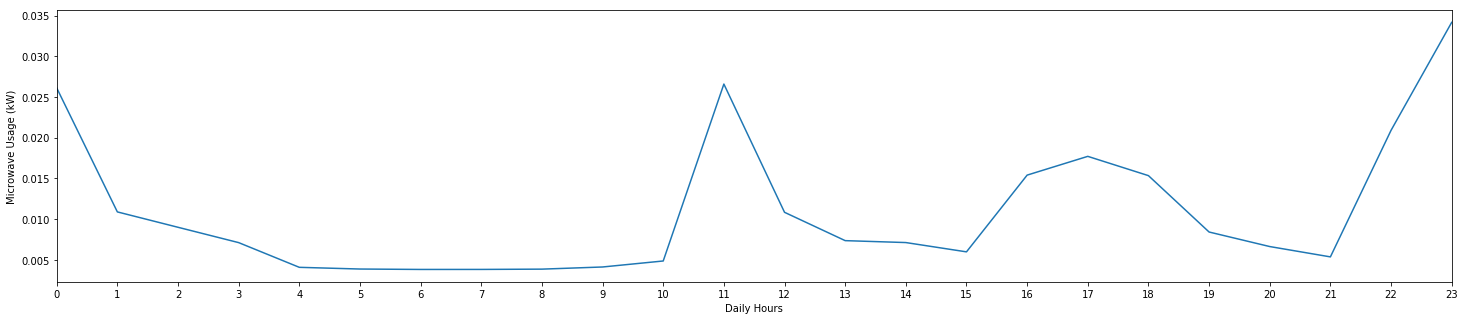

In [35]:
dataset.groupby(dataset.index.hour).mean()['Microwave'].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='Microwave Usage (kW)')

> Now we see that a usual pattern around 11am-1pm and 16pm-18pm. However, at late night there is a weird usage!

## G. Moving Average

Let's start with a naive hypothesis: "tomorrow will be the same as today". However, instead of a model like $\hat{y}_{t} = y_{t-1}$ (which is actually a great baseline for any time series prediction problems and sometimes is impossible to beat), we will assume that the future value of our variable depends on the average of its $k$ previous values. Therefore, we will use the **moving average**.

$\hat{y}_{t} = \frac{1}{k} \displaystyle\sum^{k}_{n=1} y_{t-n}$
 > More info on MA: https://www.investopedia.com/terms/m/movingaverage.asp

> Pandas has an implementation available with [`DataFrame.rolling(window).mean()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html). The wider the window, the smoother the trend. In the case of very noisy data, which is often encountered in finance, this procedure can help detect common patterns.[](http://)

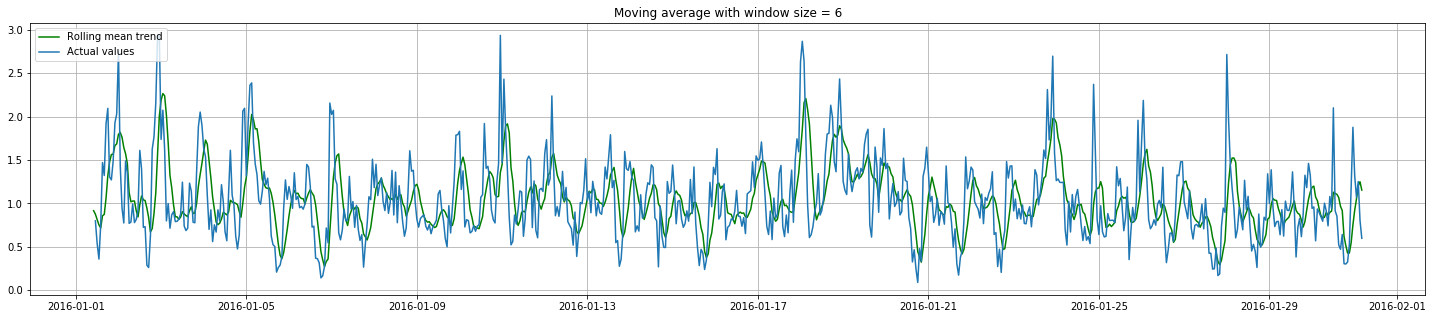

In [36]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(25,5))
    plt.title("Moving average with window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

n_samples = 24*30 # 1 month
cols = ['use']
plotMovingAverage(dataset[cols][:n_samples], window=6) # A window of 6 hours

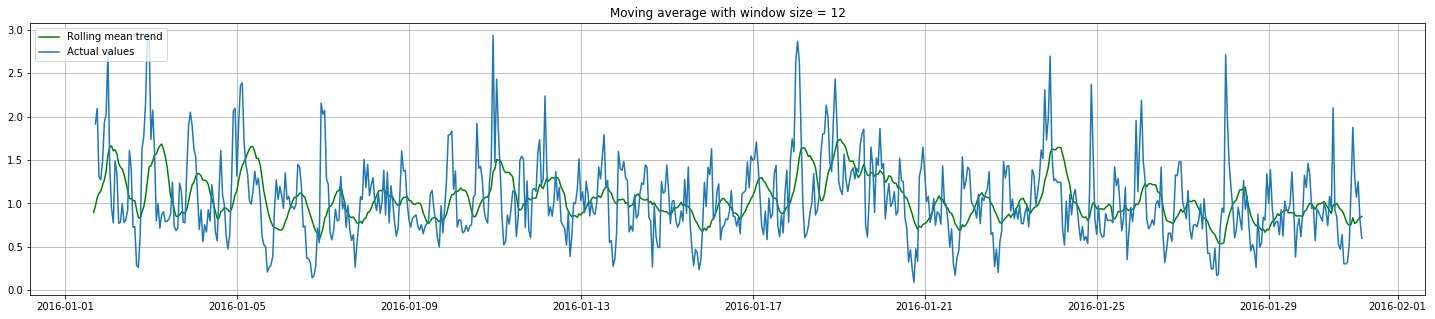

In [37]:
plotMovingAverage(dataset[cols][:n_samples], window=12) # A window of 12 hours

## H. Anomaly Detection 

The simplest way to detect anomaly in time-series is using the moving average as the trend of the data and points that are feviate from the moving average be considered as anomaly.

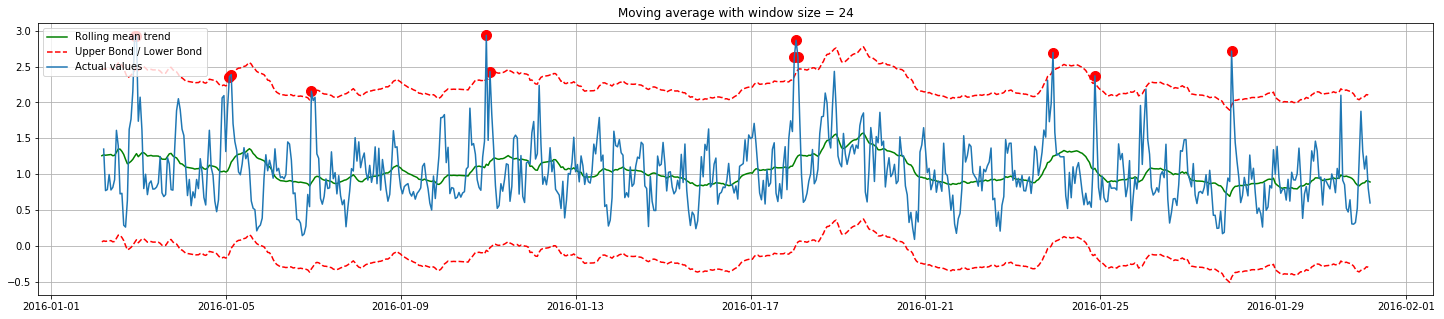

In [38]:
plotMovingAverage(dataset[cols][:n_samples], window=24, plot_intervals=True, plot_anomalies=True)

> More info on Detecting Anomalies with Moving Average and Median Decomposition: https://anomaly.io/anomaly-detection-moving-median-decomposition/index.html

## I. Exponential smoothing

Now, let's see what happens if we start weighting all available observations while exponentially decreasing the weights as we move further back in time. There exists a formula for **[exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)** that will help us with this:

$$\hat{y}_{t} = \alpha \cdot y_t + (1-\alpha) \cdot \hat y_{t-1} $$

Here the model value is a weighted average between the current true value and the previous model values. The $\alpha$ weight is called a smoothing factor. It defines how quickly we will "forget" the last available true observation. The smaller $\alpha$ is, the more influence the previous observations have and the smoother the series is.

Exponentiality is hidden in the recursiveness of the function -- we multiply by $(1-\alpha)$ each time, which already contains a multiplication by $(1-\alpha)$ of previous model values.

In [39]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(25, 5))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

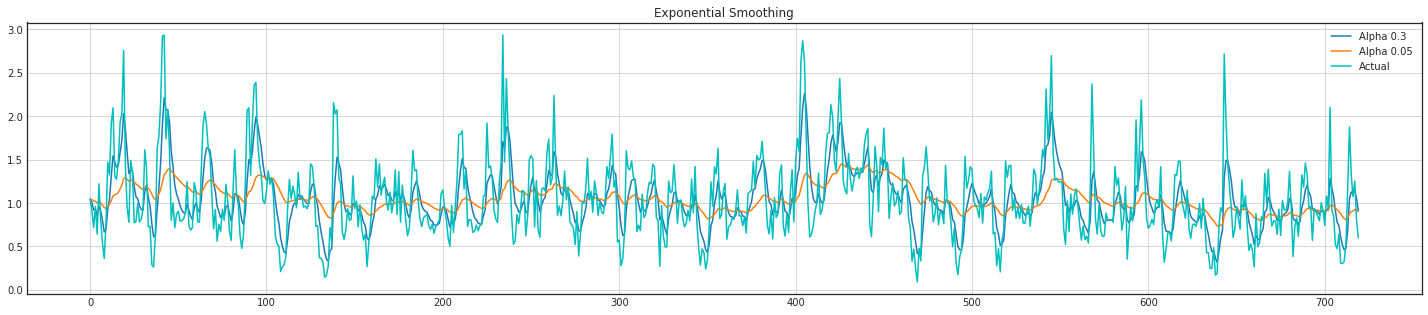

In [40]:
n_samples = 24*30 # 1 month
col = 'use'
plotExponentialSmoothing(dataset[col][:n_samples], [0.3, 0.05])

## J. Autoregressive Integrated Moving Average Model (ARIMA)
This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

In [41]:
from statsmodels.tsa.arima_model import ARIMA
def forcast_ts(data, tt_ratio):
    X = data.values
    size = int(len(X) * tt_ratio)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('progress:%',round(100*(t/len(test))),'\t predicted=%f, expected=%f' % (yhat, obs), end="\r")
    error = mean_squared_error(test, predictions)
    print('\n Test MSE: %.3f' % error)

    plt.rcParams["figure.figsize"] = (25,10)
    preds = np.append(train, predictions)
    plt.plot(list(preds), color='green', linewidth=3, label="Predicted Data")
    plt.plot(list(data), color='blue', linewidth=2, label="Original Data")
    plt.axvline(x=int(len(data)*tt_ratio)-1, linewidth=5, color='red')
    plt.legend()
    plt.show()

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


progress:% 94 	 predicted=0.943062, expected=0.935902
 Test MSE: 0.179


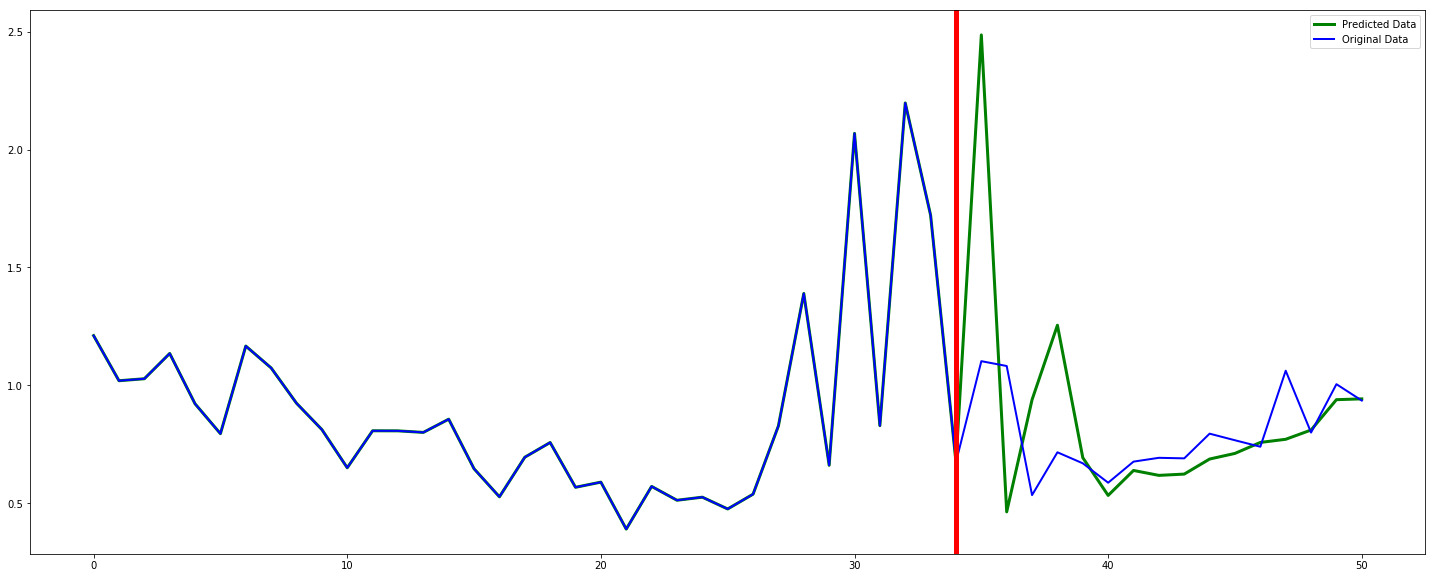

In [42]:
col = 'use'
data = dataset[col].resample('w').mean()
data.shape
tt_ratio = 0.70 # Train to Test ratio
forcast_ts(data, tt_ratio)

> Prediction using `weekly` data is not accurate enough. Let's train an ARIMA model week `daily` data instead.

progress:% 99 	 predicted=0.957226, expected=1.369397
 Test MSE: 0.076


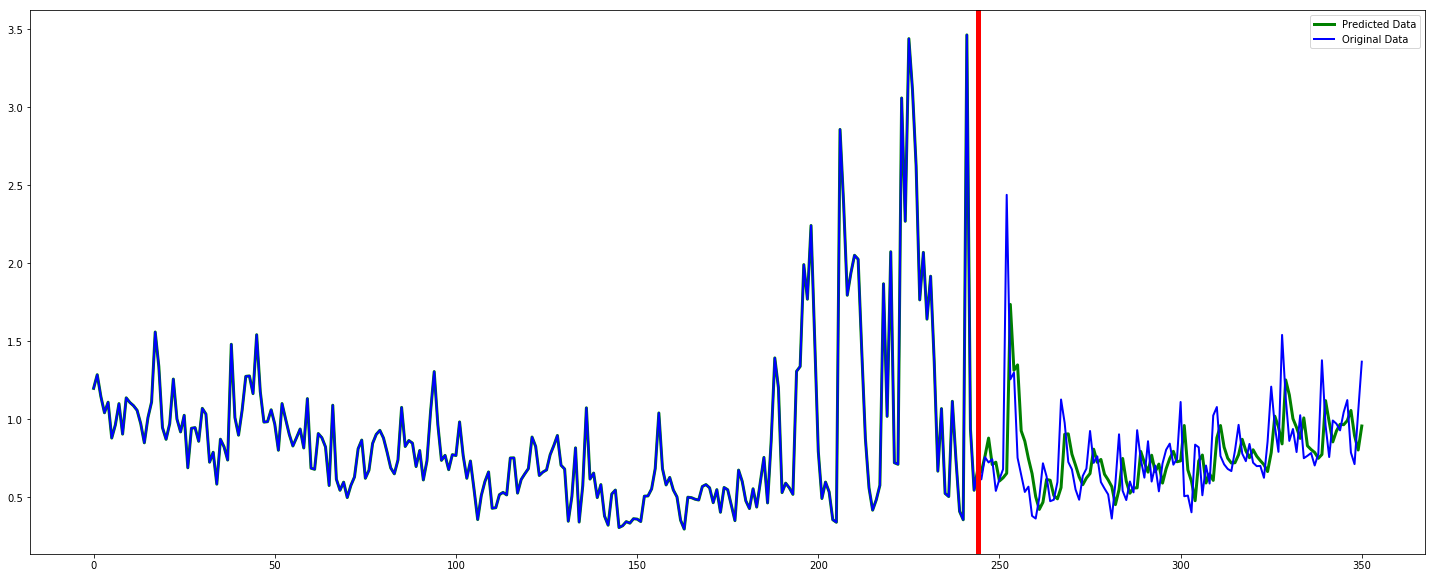

In [43]:
col = 'use'
data = dataset[col].resample('d').mean()
data.shape
tt_ratio = 0.70 # Train to Test ratio
forcast_ts(data, tt_ratio)

#### A note on time series cross validation

Before we start building a model, let's first discuss how to estimate model parameters automatically.

There is nothing unusual here; as always, we have to choose a loss function suitable for the task that will tell us how closely the model approximates the data. Then, using cross-validation, we will evaluate our chosen loss function for the given model parameters, calculate the gradient, adjust the model parameters, and so on, eventually descending to the global minimum.

You may be asking how to do cross-validation for time series because time series have this temporal structure and one cannot randomly mix values in a fold while preserving this structure. With randomization, all time dependencies between observations will be lost. This is why we will have to use a more tricky approach in optimizing the model parameters. I don't know if there's an official name to this, but on [CrossValidated](https://stats.stackexchange.com/questions/14099/using-k-fold-cross-validation-for-time-series-model-selection), where one can find all answers but the Answer to the Ultimate Question of Life, the Universe, and Everything, the proposed name for this method is "cross-validation on a rolling basis".

The idea is rather simple -- we train our model on a small segment of the time series from the beginning until some $t$, make predictions for the next $t+n$ steps, and calculate an error. Then, we expand our training sample to $t+n$ value, make predictions from $t+n$ until $t+2*n$, and continue moving our test segment of the time series until we hit the last available observation. As a result, we have as many folds as $n$ will fit between the initial training sample and the last observation.

<img src="https://habrastorage.org/files/f5c/7cd/b39/f5c7cdb39ccd4ba68378ca232d20d864.png"/>


In [44]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)  

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


## K. Time-Series Prediction with Recurrent Neural Networks

Here we want to use current weather information for predicting the energy usage.

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
keras.__version__

Using TensorFlow backend.


'2.3.0'

In [46]:
weather_features = dataset[['temperature','humidity', 'visibility','windSpeed', 'pressure', 'cloudCover', 'windBearing', 'precipIntensity','precipProbability']]
energy_use = dataset['use']

x_train = weather_features[:7000]
y_train = energy_use[:7000]

x_test = weather_features[7000:]
y_test = energy_use[7000:]

x_train = np.reshape(x_train.values, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test.values, (x_test.shape[0], x_test.shape[1], 1))


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7000, 9, 1), (7000,), (1399, 9, 1), (1399,))

In [47]:
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=32))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 9, 32)             4352      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(x_train, y_train, epochs = 16, batch_size = 32)

Epoch 1/16
7000/7000 [==============================] - 3s 376us/step - loss: 0.7537
Epoch 2/16
7000/7000 [==============================] - 2s 271us/step - loss: 0.7370
Epoch 3/16
7000/7000 [==============================] - 2s 268us/step - loss: 0.7361
Epoch 4/16
7000/7000 [==============================] - 2s 266us/step - loss: 0.7356
Epoch 5/16
7000/7000 [==============================] - 2s 269us/step - loss: 0.7351
Epoch 6/16
7000/7000 [==============================] - 2s 271us/step - loss: 0.7347
Epoch 7/16
7000/7000 [==============================] - 2s 270us/step - loss: 0.7362
Epoch 8/16
7000/7000 [==============================] - 2s 276us/step - loss: 0.7348
Epoch 9/16
7000/7000 [==============================] - 2s 273us/step - loss: 0.7368
Epoch 10/16
7000/7000 [==============================] - 2s 271us/step - loss: 0.7341
Epoch 11/16
7000/7000 [==============================] - 2s 272us/step - loss: 0.7337
Epoch 12/16
7000/7000 [==============================] - 2s 270

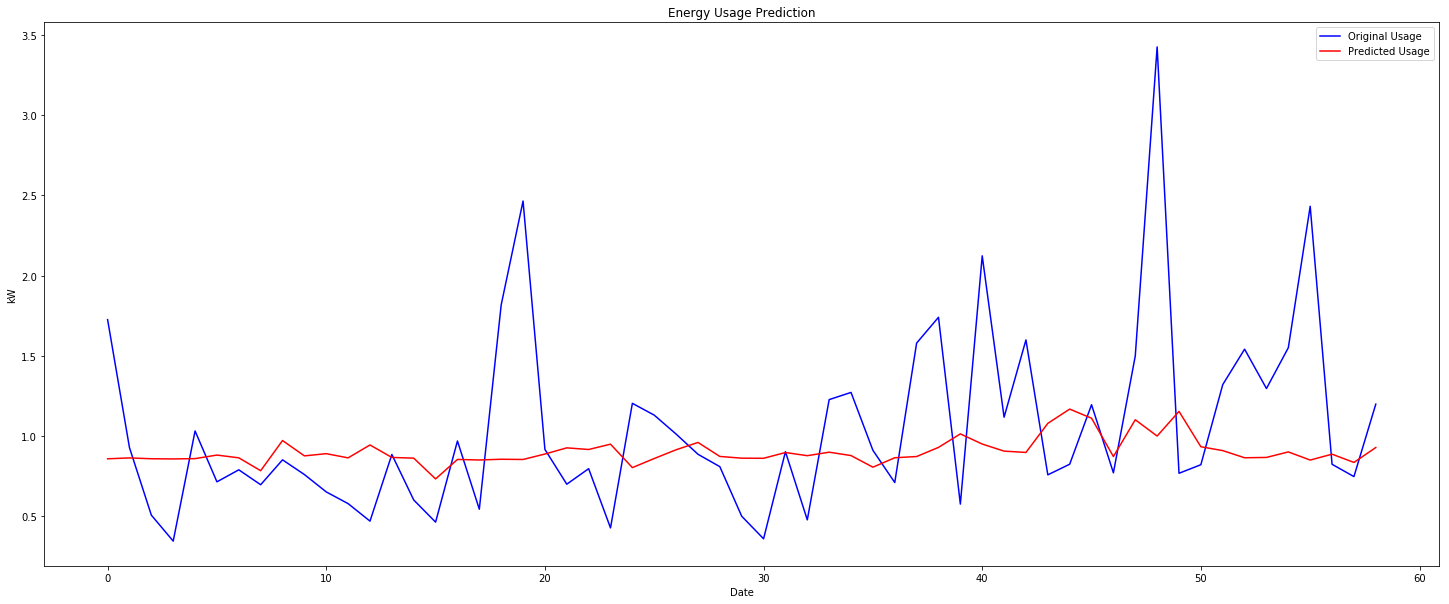

In [49]:
predictions = model.predict(x_test)
plt.figure(figsize=(25,10))
plt.plot(y_test.values[::24], color='blue', label='Original Usage')
plt.plot(predictions[:,0][::24] , color='red', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.show()

> As we see the predictions are not that good!

> So, how can we make it better?!

> One idea: for each day, in addition to the current day's weather data, we can use the yesterdays energy usage as a feature as well.

In [50]:
weather_features = dataset[['temperature','humidity', 'visibility','windSpeed', 'pressure', 'cloudCover', 'windBearing', 'precipIntensity','precipProbability']]
energy_use = dataset['use']
weather_features = weather_features['2016-01-02 05:00:00':'2016-12-02 05:00:00']
weather_features['yesterday_use'] = energy_use['2016-01-01 05:00:00':'2016-12-01 05:00:00'].values
energy_use = dataset['use']['2016-01-02 05:00:00':'2016-12-02 05:00:00']
weather_features.shape, energy_use.shape

((8041, 10), (8041,))

In [51]:
x_train = weather_features[:5000]
y_train = energy_use[:5000]

x_test = weather_features[5000:]
y_test = energy_use[5000:]

x_train = np.reshape(x_train.values, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test.values, (x_test.shape[0], x_test.shape[1], 1))


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5000, 10, 1), (5000,), (3041, 10, 1), (3041,))

In [52]:
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=32))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 32)            4352      
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(x_train, y_train, epochs = 16, batch_size = 32)

Epoch 1/16
5000/5000 [==============================] - 2s 418us/step - loss: 0.4602
Epoch 2/16
5000/5000 [==============================] - 1s 296us/step - loss: 0.3953
Epoch 3/16
5000/5000 [==============================] - 2s 307us/step - loss: 0.3714
Epoch 4/16
5000/5000 [==============================] - 2s 311us/step - loss: 0.3706
Epoch 5/16
5000/5000 [==============================] - 2s 310us/step - loss: 0.3674
Epoch 6/16
5000/5000 [==============================] - 2s 309us/step - loss: 0.3666
Epoch 7/16
5000/5000 [==============================] - 2s 307us/step - loss: 0.3655
Epoch 8/16
5000/5000 [==============================] - 2s 307us/step - loss: 0.3631
Epoch 9/16
5000/5000 [==============================] - 2s 308us/step - loss: 0.3626
Epoch 10/16
5000/5000 [==============================] - 2s 306us/step - loss: 0.3621
Epoch 11/16
5000/5000 [==============================] - 2s 309us/step - loss: 0.3608
Epoch 12/16
5000/5000 [==============================] - 2s 316

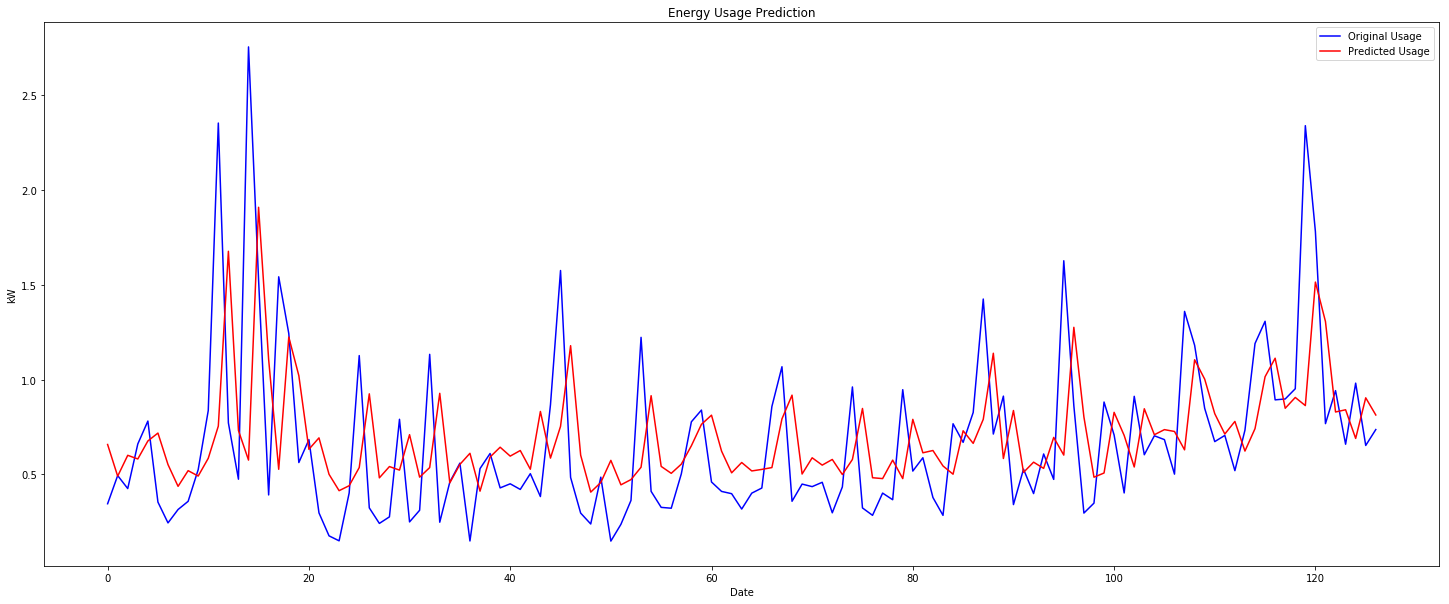

In [54]:
predictions = model.predict(x_test)
plt.figure(figsize=(25,10))
plt.plot(y_test.values[::24], color='blue', label='Original Usage')
plt.plot(predictions[:,0][::24] , color='red', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.show()

> It works much better now, but still there is something that is undesired here! can you spot it?!

## L. Credits and Further Reading
 1. https://mlcourse.ai/articles/topic1-exploratory-data-analysis-with-pandas/
 2. https://mlcourse.ai/articles/topic2-visual-data-analysis-in-python/
 3. https://mlcourse.ai/articles/topic9-part1-time-series/
 4. https://mlcourse.ai/articles/topic9-part2-prophet/
 5. https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
 6. https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b